In [1]:
#!/bin/python3
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Constantes

In [53]:
MHZ = 1e6
KHZ = 1e3
c = 299792458
f = 436*10
_lambda = c/f
k = 2*np.pi/_lambda
d = _lambda/2
mx = 4
my = 4
size = 1024**2
fs = 32*KHZ


## Contador

In [30]:
array = np.arange(16)

In [31]:

output = np.zeros((size,16), dtype='short')
for i in range(size):
    output[i,:] = array

In [32]:
np.save("contador_bytes_al_reves.npy", output)

## Generemos señal desfasada nostros mismos

In [71]:
#incoming angles
theta = np.radians(30.)
phi = np.radians(60.)
print(theta, phi-np.pi)

0.5235987755982988 -2.0943951023931957


In [66]:

#signal = np.zeros((size,mx*my), dtype='float64')
#Generate signal [s_1;s_2;...;s_size]*[1, ..., np.exp(-1j*k*d((mx-1)*cos(theta)*cos(phi) + (my-1)*cos(theta)*sin(phi)))]
complex_wave = np.exp(1j*2*np.pi*f*np.arange(size, dtype='complex64')/fs)

deltas = np.empty((mx*my, 1), dtype=np.complex64)
for i in range(mx):
    for j in range(my):
        deltas[i*my+j] = i*np.cos(phi) + j*np.sin(phi)
phase_deltas = np.exp(1j*k*d*np.cos(theta)*deltas)
signal = np.kron( complex_wave, phase_deltas).T


In [67]:
np.shape(signal)

(1048576, 16)

In [68]:
flattened_signal = signal.flatten()

In [72]:
np.save("../binarios/simulated_signal_theta_30_phi_60_dos.npy", flattened_signal)

(50.0, 70.0)

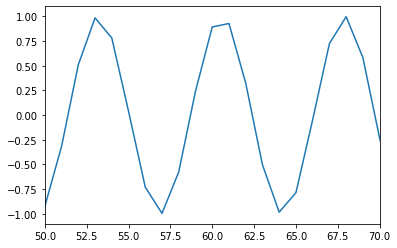

In [61]:
plt.plot(signal[:,0].imag)
plt.xlim(50,70)

In [65]:
np.save("../binarios/headerDetector_10-element-array-counter.npy", np.arange(10))